In [1]:
# Install neccessary libraries/frameworks
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install numpy
%pip install xlwings
%pip install openpyxl


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlwings as xw
# Alternative approach using openpyxl to properly format the excel
from openpyxl import load_workbook
from openpyxl.utils import get_column_letter

print("Libraries installed successfully!")

Libraries installed successfully!


In [3]:
# Read sponsored products search term report for the month of jan 2025 as df
df = pd.read_excel("Sponsored_Products_Search_term_report_2025-01_Jan.xlsx")
print(df.head(3))

        Date Portfolio name Currency                          Campaign Name  \
0 2025-01-02   No Portfolio      USD  CA | SP | PDP Defense | Running Board   
1 2025-01-18   No Portfolio      USD  CA | SP | PDP Defense | Running Board   
2 2025-01-31   No Portfolio      USD  CA | SP | PDP Defense | Running Board   

               Ad Group Name Retailer          Targeting Match Type  \
0  Running Board | 5in Tread   Amazon  asin="B07QHHCGZ2"          -   
1  Running Board | 5in Tread   Amazon  asin="B07QD8XM1Q"          -   
2  Running Board | 5in Tread   Amazon  asin="B07QD8XM1Q"          -   

  Customer Search Term  Impressions  ...  7 Day Total Sales   \
0           b07qhhcgz2            2  ...                 0.0   
1           b07qd8xm1q            4  ...                 0.0   
2           b07qd8xm1q            6  ...                 0.0   

   Total Advertising Cost of Sales (ACOS)   \
0                                      NaN   
1                                      NaN   
2  

In [4]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

print(df['Date'].head())


0   2025-01-02
1   2025-01-18
2   2025-01-31
3   2025-01-18
4   2025-01-23
Name: Date, dtype: datetime64[ns]


In [5]:
# Basic Information
print("Basic Information:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5483 entries, 0 to 5482
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      5483 non-null   datetime64[ns]
 1   Portfolio name                            5483 non-null   object        
 2   Currency                                  5483 non-null   object        
 3   Campaign Name                             5483 non-null   object        
 4   Ad Group Name                             5483 non-null   object        
 5   Retailer                                  5483 non-null   object        
 6   Targeting                                 5483 non-null   object        
 7   Match Type                                5483 non-null   object        
 8   Customer Search Term                      5483 non-null   object        
 9   Impressions

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Date                                           0
Portfolio name                                 0
Currency                                       0
Campaign Name                                  0
Ad Group Name                                  0
Retailer                                       0
Targeting                                      0
Match Type                                     0
Customer Search Term                           0
Impressions                                    0
Clicks                                         0
Click-Thru Rate (CTR)                          2
Cost Per Click (CPC)                           0
Spend                                          0
7 Day Total Sales                              0
Total Advertising Cost of Sales (ACOS)      5425
Total Return on Advertising Spend (ROAS)       0
7 Day Total Orders (#)                         0
7 Day Total Units (#)                          0
7 Day Conversion Rate                          0
7 D

In [7]:
# Remove leading/trailing whitespaces from column names
df.columns = df.columns.str.strip()

# Columns that need dollar signs removed
monetary_cols = ['Spend', '7 Day Total Sales', '7 Day Advertised SKU Sales', '7 Day Other SKU Sales']

# Remove dollar signs and convert to float
for col in monetary_cols:
    df[col] = df[col].apply(lambda x: float(str(x).replace('$', '')))

# Verify the changes
print(df[monetary_cols].head())

   Spend  7 Day Total Sales  7 Day Advertised SKU Sales  7 Day Other SKU Sales
0   0.56                0.0                         0.0                    0.0
1   0.56                0.0                         0.0                    0.0
2   1.12                0.0                         0.0                    0.0
3   0.56                0.0                         0.0                    0.0
4   1.22                0.0                         0.0                    0.0


In [8]:

# Columns that need percentage signs removed
percentage_cols = ['Click-Thru Rate (CTR)', '7 Day Conversion Rate']

# Remove percentage signs and convert to decimal
for col in percentage_cols:
    df[col] = df[col].apply(lambda x: float(str(x).replace('%', ''))/ 100)

# Verify the changes
print(df[percentage_cols].head())


   Click-Thru Rate (CTR)  7 Day Conversion Rate
0               0.005000                    0.0
1               0.002500                    0.0
2               0.003333                    0.0
3               0.005000                    0.0
4               0.001111                    0.0


In [9]:

# Clean 'Cost Per Click (CPC)' by removing '$' and converting to float
df['Cost Per Click (CPC)'] = df['Cost Per Click (CPC)'].apply(lambda x: float(str(x).replace('$', '')))

# Verify the changes
print(df[["Cost Per Click (CPC)"]].head(3))

   Cost Per Click (CPC)
0                  0.56
1                  0.56
2                  0.56


In [10]:
# Clean 'Total Advertising Cost of Sales (ACOS)' by removing '%' and converting to decimal
# Handle NaN values (empty strings in the data)
# Handle NaN values and remove '%' sign, then convert to decimal
df['Total Advertising Cost of Sales (ACOS)'] = df['Total Advertising Cost of Sales (ACOS)'].apply(lambda x: float(str(x).replace('%', '')) / 100 if pd.notnull(x) and x != '' else pd.NA)

# Verify the changes
print(df[["Total Advertising Cost of Sales (ACOS)"]].head(3))

  Total Advertising Cost of Sales (ACOS)
0                                   <NA>
1                                   <NA>
2                                   <NA>


In [11]:
# Convert 'Total Return on Advertising Spend (ROAS)' to float
df['Total Return on Advertising Spend (ROAS)'] = df['Total Return on Advertising Spend (ROAS)'].astype(float)

# Check the data type of 'Total Return on Advertising Spend (ROAS)' column
print(df['Total Return on Advertising Spend (ROAS)'].dtype)

float64


In [12]:
# Ensure integer columns
int_cols = ['Impressions', 'Clicks', '7 Day Total Orders (#)', '7 Day Total Units (#)', 
            '7 Day Advertised SKU Units (#)', '7 Day Other SKU Units (#)']
for col in int_cols:
    df[col] = df[col].astype(int)

# Verify the data types of the specified columns
print(df[int_cols].dtypes)

Impressions                       int32
Clicks                            int32
7 Day Total Orders (#)            int32
7 Day Total Units (#)             int32
7 Day Advertised SKU Units (#)    int32
7 Day Other SKU Units (#)         int32
dtype: object




The code defines a function named `categorize_targeting` that categorizes different targeting types in a DataFrame column called `Targeting`. It checks the beginning of each value in the `Targeting` column and assigns a category based on the following rules:

1. If the value starts with "asin=", it is categorized as "ASIN".
2. If the value starts with "category=", it is categorized as "Category".
3. If the value is exactly "*", it is categorized as "Auto".
4. If none of the above conditions are met, it is categorized as "Other".

The function is then applied to the `Targeting` column of the DataFrame `df`, and the results are stored in a new column called `Targeting Type`.

This way, you can easily categorize and analyze different targeting types in your DataFrame. 

In [13]:
# Categorize targeting types
def categorize_targeting(targeting):
    if targeting.startswith('asin='):
        return 'ASIN'
    elif targeting.startswith('category='):
        return 'Category'
    elif targeting == '*':
        return 'Auto'
    else:
        return 'Other'

df['Targeting Type'] = df['Targeting'].apply(categorize_targeting)




### Analysis 1: Overall Performance

1. **Calculations**:
    - **Total Spend**: Calculates the sum of the `Spend` column.
    - **Total Sales**: Calculates the sum of the `7 Day Total Sales` column.
    - **Total Impressions**: Calculates the sum of the `Impressions` column.
    - **Total Clicks**: Calculates the sum of the `Clicks` column.
    - **Average CTR (Click-Through Rate)**: Calculated as `Total Clicks / Total Impressions`. If `Total Impressions` is zero, it returns 0.
    - **Average CPC (Cost Per Click)**: Calculated as `Total Spend / Total Clicks`. If `Total Clicks` is zero, it returns 0.
    - **Average ACOS (Advertising Cost of Sale)**: Calculated as `Total Spend / Total Sales`. If `Total Sales` is zero, it returns infinity.
    - **Average ROAS (Return on Advertising Spend)**: Calculated as `Total Sales / Total Spend`. If `Total Spend` is zero, it returns 0.

2. **Print Statements**:
    - Displays the calculated metrics in a readable format with proper formatting.

3. **Create a DataFrame with Properly Formatted Values**:
    - A DataFrame named `df_overall_performance` is created with two columns: `Metric` and `Value`.
    - Each metric (e.g., Total Spend, Total Sales) is listed in the `Metric` column.
    - The calculated values are listed in the `Value` column with appropriate formatting (e.g., currency format for spend and sales, percentage format for CTR and ACOS).
    - If the average ACOS is infinity, it is replaced with "N/A".

4. **Print the DataFrame**:
    - Displays the first three rows of the `df_overall_performance` DataFrame.

This code provides an overview of the overall performance metrics and formats the results into a DataFrame for easy viewing and further analysis. 

In [14]:
# Analysis 1: Overall Performance
total_spend = df['Spend'].sum()
total_sales = df['7 Day Total Sales'].sum()
total_impressions = df['Impressions'].sum()
total_clicks = df['Clicks'].sum()
average_ctr = total_clicks / total_impressions if total_impressions > 0 else 0
average_cpc = total_spend / total_clicks if total_clicks > 0 else 0
average_acos = total_spend / total_sales if total_sales > 0 else float('inf')
average_roas = total_sales / total_spend if total_spend > 0 else 0

print("### Overall Performance ###")
print(f"Total Spend: ${total_spend:.2f}")
print(f"Total Sales: ${total_sales:.2f}")
print(f"Total Impressions: {total_impressions}")
print(f"Total Clicks: {total_clicks}")
print(f"Average CTR: {average_ctr:.2%}")
print(f"Average CPC: ${average_cpc:.2f}")
print(f"Average ACOS: {average_acos:.2%}")
print(f"Average ROAS: {average_roas:.2f}")


# Create a DataFrame with properly formatted values
df_overall_performance = pd.DataFrame({
    "Metric": ["Total Spend", "Total Sales", "Total Impressions", "Total Clicks", "Average CTR", "Average CPC", "Average ACOS", "Average ROAS"],
    "Value": [
        f"${total_spend:.2f}", 
        f"${total_sales:.2f}", 
        f"{total_impressions:,}", 
        f"{total_clicks:,}", 
        f"{average_ctr:.2%}", 
        f"${average_cpc:.2f}", 
        f"{average_acos:.2%}" if average_acos != float('inf') else "N/A", 
        f"{average_roas:.2f}"
    ]
})

print(df_overall_performance.head(3))

### Overall Performance ###
Total Spend: $4182.13
Total Sales: $17163.28
Total Impressions: 76532
Total Clicks: 6079
Average CTR: 7.94%
Average CPC: $0.69
Average ACOS: 24.37%
Average ROAS: 4.10
              Metric      Value
0        Total Spend   $4182.13
1        Total Sales  $17163.28
2  Total Impressions     76,532




### Analysis 2: Performance by Campaign

1. **Group by 'Campaign Name'**:
    - The code groups the DataFrame `df` by the 'Campaign Name' column.
    - For each campaign, it calculates the sum of 'Spend', '7 Day Total Sales', 'Impressions', and 'Clicks'.
    - The result is stored in the `campaign_performance` DataFrame.

2. **Calculate ROAS (Return on Advertising Spend)**:
    - A new column 'ROAS (Return on Advertising Spend)' is added to the `campaign_performance` DataFrame.
    - This column is calculated by dividing '7 Day Total Sales' by 'Spend', which gives the return on advertising spend for each campaign.

3. **Sort by Spend**:
    - The `campaign_performance` DataFrame is sorted in descending order by the 'Spend' column.
    - This ensures that campaigns with the highest spend appear first.

4. **Print Top 5 Campaigns by Spend**:
    - The top 5 campaigns (based on spend) are printed along with their 'Campaign Name', 'Spend', '7 Day Total Sales', and 'ROAS (Return on Advertising Spend)'.

5. **Create a DataFrame**:
    - The `campaign_performance` DataFrame is explicitly converted to a new DataFrame `df_performance_by_campaign`.
    - The first three rows of `df_performance_by_campaign` are printed.

This code allows you to analyze the performance of different campaigns by summarizing key metrics and calculating the ROAS. The results are sorted to highlight the top campaigns by spend, providing a clear overview of campaign performance.



In [15]:
# Analysis 2: Performance by Campaign
campaign_performance = df.groupby('Campaign Name').agg({
    'Spend': 'sum',
    '7 Day Total Sales': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum'
}).reset_index()

campaign_performance['ROAS (Return on Advertising Spend)'] = campaign_performance['7 Day Total Sales'] / campaign_performance['Spend']
campaign_performance = campaign_performance.sort_values(by='Spend', ascending=False)


print("\n### Top 5 Campaigns by Spend ###")
print(campaign_performance.head()[['Campaign Name', 'Spend', '7 Day Total Sales', 'ROAS (Return on Advertising Spend)']])

# Create a DataFrame
df_performance_by_campaign = pd.DataFrame(campaign_performance)
print(df_performance_by_campaign.head(3))




### Top 5 Campaigns by Spend ###
                                        Campaign Name    Spend  \
5                   CA | SP | Auto | Jeep Wrangler JK  1896.49   
13                     CA | SP | Auto | Toyota Tundra   396.43   
9    CA | SP | Auto | Silverado/Sierra 1500/2500/3500   357.19   
2   CA | SP | Auto | Ford F-150/F-250/F-350 Super ...   314.72   
6                   CA | SP | Auto | Jeep Wrangler JL   308.30   

    7 Day Total Sales  ROAS (Return on Advertising Spend)  
5             7635.32                            4.026027  
13            2769.93                            6.987186  
9             2692.93                            7.539209  
2              394.99                            1.255052  
6              784.22                            2.543691  
                                       Campaign Name    Spend  \
5                  CA | SP | Auto | Jeep Wrangler JK  1896.49   
13                    CA | SP | Auto | Toyota Tundra   396.43   
9   CA | SP | 



### Analysis 3: Performance by Ad Group

1. **Group by 'Ad Group Name'**:
    - The code groups the DataFrame `df` by the 'Ad Group Name' column.
    - For each ad group, it calculates the sum of 'Spend', '7 Day Advertised SKU Sales', and '7 Day Other SKU Sales'.
    - The result is stored in the `ad_group_performance` DataFrame.

2. **Calculate Total Sales**:
    - A new column 'Total Sales' is added to the `ad_group_performance` DataFrame.
    - This column is calculated by summing '7 Day Advertised SKU Sales' and '7 Day Other SKU Sales'.

3. **Calculate ROAS (Return on Advertising Spend)**:
    - Another new column 'ROAS (Return on Advertising Spend)' is added to the `ad_group_performance` DataFrame.
    - This column is calculated by dividing 'Total Sales' by 'Spend', which gives the return on advertising spend for each ad group.

4. **Sort by Spend**:
    - The `ad_group_performance` DataFrame is sorted in descending order by the 'Spend' column.
    - This ensures that ad groups with the highest spend appear first.

5. **Print Top 5 Ad Groups by Spend**:
    - The top 5 ad groups (based on spend) are printed along with their 'Ad Group Name', 'Spend', '7 Day Advertised SKU Sales', '7 Day Other SKU Sales', and 'ROAS (Return on Advertising Spend)'.

6. **Create a DataFrame**:
    - The `ad_group_performance` DataFrame is explicitly converted to a new DataFrame `df_performance_by_adgroup`.
    - The first three rows of `df_performance_by_adgroup` are printed.

This code allows you to analyze the performance of different ad groups by summarizing key metrics and calculating the ROAS. The results are sorted to highlight the top ad groups by spend, providing a clear overview of ad group performance.



In [16]:
# Analysis 3: Performance by Ad Group
ad_group_performance = df.groupby('Ad Group Name').agg({
    'Spend': 'sum',
    '7 Day Advertised SKU Sales': 'sum',
    '7 Day Other SKU Sales': 'sum'
}).reset_index()

ad_group_performance['Total Sales'] = ad_group_performance['7 Day Advertised SKU Sales'] + ad_group_performance['7 Day Other SKU Sales']
ad_group_performance['ROAS (Return on Advertising Spend)'] = ad_group_performance['Total Sales'] / ad_group_performance['Spend']
ad_group_performance = ad_group_performance.sort_values(by='Spend', ascending=False)

print("\n### Top 5 Ad Groups by Spend ###")
print(ad_group_performance.head(5)[['Ad Group Name', 'Spend', '7 Day Advertised SKU Sales', '7 Day Other SKU Sales', 'ROAS (Return on Advertising Spend)']])

# Create a DataFrame
df_performance_by_adgroup = pd.DataFrame(ad_group_performance)
print(df_performance_by_adgroup.head(3))



### Top 5 Ad Groups by Spend ###
          Ad Group Name   Spend  7 Day Advertised SKU Sales  \
6       Coil Spring Kit  768.64                      969.97   
21             Sway Bar  697.74                     1944.94   
24            Track Bar  567.07                     1292.92   
15  Running Board | 6in  548.76                     2654.93   
11        Running Board  540.38                     1974.95   

    7 Day Other SKU Sales  ROAS (Return on Advertising Spend)  
6                  152.99                            1.460970  
21                 617.95                            3.673130  
24                2360.78                            6.443120  
15                 789.98                            6.277626  
11                 789.98                            5.116640  
      Ad Group Name   Spend  7 Day Advertised SKU Sales  \
6   Coil Spring Kit  768.64                      969.97   
21         Sway Bar  697.74                     1944.94   
24        Track Bar  567.0



### Analysis 4: Performance by Targeting Type

1. **Group by 'Targeting Type'**:
    - The code groups the DataFrame `df` by the 'Targeting Type' column.
    - For each targeting type, it calculates the sum of 'Spend', '7 Day Total Sales', 'Impressions', and 'Clicks'.
    - The result is stored in the `targeting_performance` DataFrame.

2. **Calculate ROAS (Return on Advertising Spend)**:
    - A new column 'ROAS (Return on Advertising Spend)' is added to the `targeting_performance` DataFrame.
    - This column is calculated by dividing '7 Day Total Sales' by 'Spend', which gives the return on advertising spend for each targeting type.

3. **Print Performance by Targeting Type**:
    - The performance metrics for each targeting type are printed, including 'Targeting Type', 'Spend', '7 Day Total Sales', and 'ROAS (Return on Advertising Spend)'.

4. **Create a DataFrame**:
    - The `targeting_performance` DataFrame is explicitly converted to a new DataFrame `df_performance_by_targetingtype`.
    - The first three rows of `df_performance_by_targetingtype` are printed.

This code allows you to analyze the performance of different targeting types by summarizing key metrics and calculating the ROAS. The results provide a clear overview of how each targeting type is performing in terms of spend, sales, impressions, clicks, and ROAS.



In [17]:
# Analysis 4: Performance by Targeting Type
targeting_performance = df.groupby('Targeting Type').agg({
    'Spend': 'sum',
    '7 Day Total Sales': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum'
}).reset_index()

targeting_performance['ROAS (Return on Advertising Spend)'] = targeting_performance['7 Day Total Sales'] / targeting_performance['Spend']
print("\n### Performance by Targeting Type ###")
print(targeting_performance[['Targeting Type', 'Spend', '7 Day Total Sales', 'ROAS (Return on Advertising Spend)']])

# Create a DataFrame
df_performance_by_targetingtype = pd.DataFrame(targeting_performance)
print(df_performance_by_targetingtype.head(3))


### Performance by Targeting Type ###
  Targeting Type    Spend  7 Day Total Sales  \
0           ASIN   196.07             996.95   
1           Auto  3681.07           16166.33   
2       Category    74.10               0.00   
3          Other   230.89               0.00   

   ROAS (Return on Advertising Spend)  
0                            5.084664  
1                            4.391748  
2                            0.000000  
3                            0.000000  
  Targeting Type    Spend  7 Day Total Sales  Impressions  Clicks  \
0           ASIN   196.07             996.95         4077     144   
1           Auto  3681.07           16166.33        67991    5602   
2       Category    74.10               0.00         1739     174   

   ROAS (Return on Advertising Spend)  
0                            5.084664  
1                            4.391748  
2                            0.000000  



### Analysis 5: Top Keywords for Auto Campaigns

1. **Filter for Auto Campaigns**:
    - The code filters the DataFrame `df` to include only rows where the `Targeting` column equals `*`, which indicates auto campaigns.

2. **Group by 'Customer Search Term'**:
    - The filtered data is then grouped by the `Customer Search Term` column.
    - For each search term, it calculates the sum of 'Spend', '7 Day Total Sales', 'Impressions', and 'Clicks'.
    - The result is stored in the `keyword_performance` DataFrame.

3. **Calculate ROAS (Return on Advertising Spend)**:
    - A new column 'ROAS (Return on Advertising Spend)' is added to the `keyword_performance` DataFrame.
    - This column is calculated by dividing '7 Day Total Sales' by 'Spend', which gives the return on advertising spend for each keyword.

4. **Sort by Spend**:
    - The `keyword_performance` DataFrame is sorted in descending order by the 'Spend' column.
    - This ensures that keywords with the highest spend appear first.

5. **Print Top 5 Keywords by Spend**:
    - The top 5 keywords (based on spend) are printed along with their 'Customer Search Term', 'Spend', '7 Day Total Sales', and 'ROAS (Return on Advertising Spend)'.

6. **Create a DataFrame**:
    - The `keyword_performance` DataFrame is explicitly converted to a new DataFrame `df_performance_by_autocampaigns`.
    - The first three rows of `df_performance_by_autocampaigns` are printed.

This code allows you to analyze the performance of different keywords used in auto campaigns by summarizing key metrics and calculating the ROAS. The results are sorted to highlight the top keywords by spend, providing a clear overview of keyword performance in auto campaigns.



In [18]:
# Analysis 5: Top Keywords for Auto Campaigns
keyword_performance = df[df['Targeting'] == '*'].groupby('Customer Search Term').agg({
    'Spend': 'sum',
    '7 Day Total Sales': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum'
}).reset_index()

keyword_performance['ROAS (Return on Advertising Spend)'] = keyword_performance['7 Day Total Sales'] / keyword_performance['Spend']
keyword_performance = keyword_performance.sort_values(by='Spend', ascending=False)
print("\n### Top 5 Keywords by Spend (Auto Campaigns) ###")
print(keyword_performance.head(5)[['Customer Search Term', 'Spend', '7 Day Total Sales', 'ROAS (Return on Advertising Spend)']])

# Create a DataFrame
df_performance_by_autocampaigns = pd.DataFrame(keyword_performance)
print(df_performance_by_autocampaigns.head(3))



### Top 5 Keywords by Spend (Auto Campaigns) ###
       Customer Search Term  Spend  7 Day Total Sales  \
797              b07d3br1p9  76.58               0.00   
2596         running boards  69.29             789.98   
947              b07r1933kn  29.77             419.99   
2545  raptor running boards  21.58               0.00   
2647    steering stabilizer  17.97               0.00   

      ROAS (Return on Advertising Spend)  
797                             0.000000  
2596                           11.401068  
947                            14.107827  
2545                            0.000000  
2647                            0.000000  
     Customer Search Term  Spend  7 Day Total Sales  Impressions  Clicks  \
797            b07d3br1p9  76.58               0.00         9609     131   
2596       running boards  69.29             789.98         2059      78   
947            b07r1933kn  29.77             419.99         2605      53   

      ROAS (Return on Advertising Spend)  
7



### Analysis 6: Cross-Selling Analysis

1. **Calculations**:
    - **Total Advertised SKU Sales**: Calculates the sum of the `7 Day Advertised SKU Sales` column.
    - **Total Other SKU Sales**: Calculates the sum of the `7 Day Other SKU Sales` column.
    - **Cross-Sell Ratio**: Calculated as `Total Other SKU Sales / Total Advertised SKU Sales`. If `Total Advertised SKU Sales` is zero, it returns 0.

2. **Print Statements**:
    - Displays the calculated metrics in a readable format with proper formatting.

3. **Create a DataFrame**:
    - A DataFrame named `df_cross_selling_analysis` is created with two columns: `Metric` and `Value`.
    - Each metric (e.g., Total Advertised SKU Sales, Total Other SKU Sales) is listed in the `Metric` column.
    - The calculated values are listed in the `Value` column.

4. **Print the DataFrame**:
    - Displays the first three rows of the `df_cross_selling_analysis` DataFrame.

This code provides an overview of the cross-selling performance metrics and formats the results into a DataFrame for easy viewing and further analysis. 

In [19]:
# Analysis 6: Cross-Selling Analysis
total_advertised_sales = df['7 Day Advertised SKU Sales'].sum()
total_other_sales = df['7 Day Other SKU Sales'].sum()
cross_sell_ratio = total_other_sales / total_advertised_sales if total_advertised_sales > 0 else 0

print("\n### Cross-Selling Analysis ###")
print(f"Total Advertised SKU Sales: ${total_advertised_sales:.2f}")
print(f"Total Other SKU Sales: ${total_other_sales:.2f}")
print(f"Cross-Sell Ratio (Other / Advertised): {cross_sell_ratio:.2f}")

# Sample data
column2 = {
    "Metric": ["Total Advertised SKU Sales", "Total Other SKU Sales", "Cross-Sell Ratio (Other / Advertised)"],
    "Value": [total_advertised_sales, total_other_sales, cross_sell_ratio]
}


# Create a DataFrame
df_cross_selling_analysis = pd.DataFrame(column2)
print(df_performance_by_autocampaigns.head(3))


### Cross-Selling Analysis ###
Total Advertised SKU Sales: $10312.65
Total Other SKU Sales: $6850.63
Cross-Sell Ratio (Other / Advertised): 0.66
     Customer Search Term  Spend  7 Day Total Sales  Impressions  Clicks  \
797            b07d3br1p9  76.58               0.00         9609     131   
2596       running boards  69.29             789.98         2059      78   
947            b07r1933kn  29.77             419.99         2605      53   

      ROAS (Return on Advertising Spend)  
797                             0.000000  
2596                           11.401068  
947                            14.107827  




### Visualization: Daily Spend and Sales Trend

1. **Calculate Daily Performance**:
    - The code groups the DataFrame `df` by the 'Date' column.
    - For each date, it calculates the sum of 'Spend' and '7 Day Total Sales'.
    - The result is stored in the `daily_performance` DataFrame.

2. **Create a Plot**:
    - A new figure is created with a specified size (12 by 6 inches).
    - Two line plots are created:
      - The first plot shows the 'Spend' trend over time, with 'Date' on the x-axis and 'Spend' on the y-axis, colored blue and labeled 'Spend'.
      - The second plot shows the '7 Day Total Sales' trend over time, with 'Date' on the x-axis and '7 Day Total Sales' on the y-axis, colored green and labeled 'Sales'.

3. **Add Titles and Labels**:
    - The plot is given a title: "Daily Spend and Sales Trend".
    - The x-axis is labeled 'Date'.
    - The y-axis is labeled 'Amount ($)'.
    - A legend is added to distinguish between 'Spend' and 'Sales' lines.

4. **Format the x-axis**:
    - The x-axis tick labels (dates) are rotated 45 degrees for better readability.

5. **Adjust Layout and Show the Plot**:
    - The layout is adjusted to ensure the plot fits well within the figure.
    - The plot is displayed.

This code provides a visual representation of the daily trends in spend and sales, allowing you to easily observe patterns and changes over time.



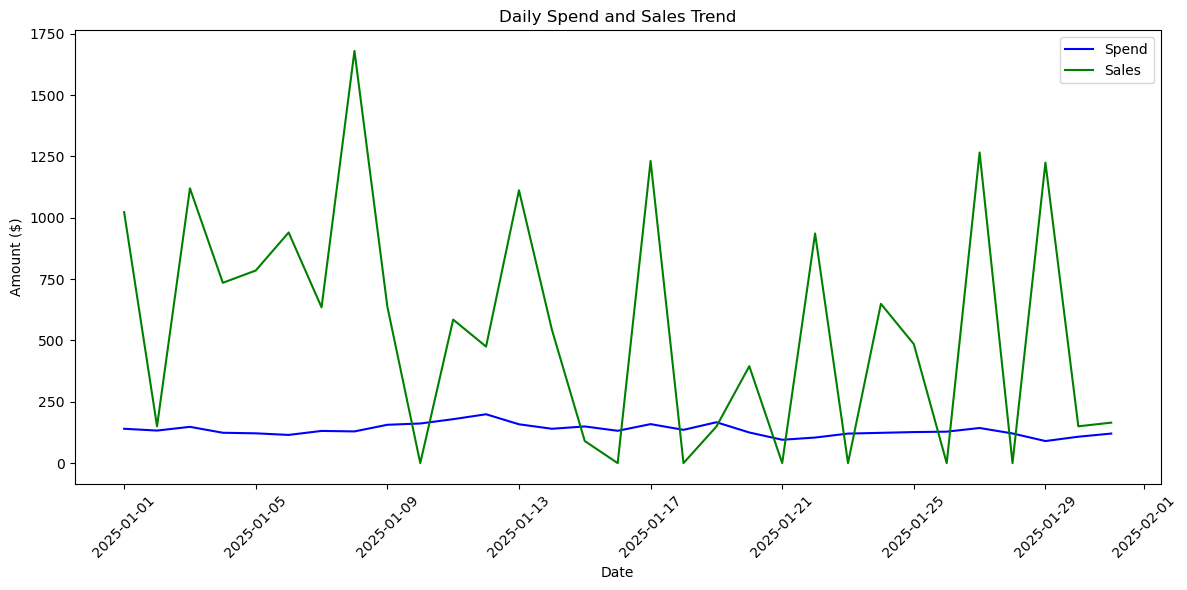

In [20]:
# Visualization: Daily Spend and Sales Trend
daily_performance = df.groupby('Date').agg({
    'Spend': 'sum',
    '7 Day Total Sales': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_performance['Date'], daily_performance['Spend'], label='Spend', color='blue')
plt.plot(daily_performance['Date'], daily_performance['7 Day Total Sales'], label='Sales', color='green')
plt.title('Daily Spend and Sales Trend')
plt.xlabel('Date')
plt.ylabel('Amount ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# Save to different sheets in the same Excel file
with pd.ExcelWriter('multi_analysis.xlsx') as writer:
    df_overall_performance.to_excel(writer, sheet_name='Analysis 1 - Overall', index=False)
    df_performance_by_campaign.to_excel(writer, sheet_name='Analysis 2 - Campaign', index=False)
    df_performance_by_adgroup.to_excel(writer, sheet_name='Analysis 3 - Ad Group', index=False)
    df_performance_by_targetingtype.to_excel(writer, sheet_name='Analysis 4 - Targeting', index=False)
    df_performance_by_autocampaigns.to_excel(writer, sheet_name='Analysis 5 - Keywords', index=False)
    df_cross_selling_analysis.to_excel(writer, sheet_name='Analysis 6 - Cross-Selling', index=False)
    daily_performance.to_excel(writer, sheet_name='Visualization - Daily', index=False)

print("All analyses saved to multi_analysis.xlsx with different sheets")

# Function to autofit column widths
def autofit_columns_with_openpyxl(filename):
    try:
        workbook = load_workbook(filename)
        
        for worksheet_name in workbook.sheetnames:
            worksheet = workbook[worksheet_name]
            
            for column in worksheet.columns:
                max_length = 0
                column_letter = get_column_letter(column[0].column)
                
                for cell in column:
                    if cell.value:
                        max_length = max(max_length, len(str(cell.value)))
                
                # Adjust column width (with some padding)
                adjusted_width = max_length + 2
                worksheet.column_dimensions[column_letter].width = adjusted_width
        
        workbook.save(filename)
        print(f"Excel columns in {filename} have been adjusted successfully with openpyxl.")
        return True
    except Exception as e:
        print(f"Error adjusting columns with openpyxl: {e}")
        return False

# Call the function to autofit columns
autofit_columns_with_openpyxl('multi_analysis.xlsx')

All analyses saved to multi_analysis.xlsx with different sheets
Excel columns in multi_analysis.xlsx have been adjusted successfully with openpyxl.


True